In [1]:
import pandas as pd

df = pd.read_csv("C:/Users/supri/Downloads/diabetic_prediction_dataset_v2.csv")

print("Dataset Shape:", df.shape)
print("\nColumn Names:\n", df.columns)
print("\nSample Data:\n", df.head())

print("\nUnique values in HbA1c column:\n", df["HbA1c"].unique())

Dataset Shape: (1000, 10)

Column Names:
 Index(['Diabetes_Status', 'Diet_Quality', 'Physical_Activity_Level',
       'Smoking_Status', 'Family_History', 'Glucose_Level', 'Insulin_Level',
       'BMI', 'Age', 'HbA1c'],
      dtype='object')

Sample Data:
    Diabetes_Status Diet_Quality Physical_Activity_Level  Smoking_Status  \
0                0         Good                Moderate  Current Smoker   
1                0         Good                    High  Current Smoker   
2                1         Good                    High      Non-Smoker   
3                1         Poor                     Low   Former Smoker   
4                0         Good                    High      Non-Smoker   

  Family_History  Glucose_Level  Insulin_Level        BMI  Age  \
0            Yes      81.512847       1.637218  29.918798   22   
1             No     107.371667      12.784553  30.160025   57   
2            Yes     141.782099      28.219859  25.802436   35   
3             No     186.9504

In [2]:
df.replace({"???": None, "unknown": None}, inplace=True)
print(df.isnull().sum()) 

Diabetes_Status              0
Diet_Quality                 0
Physical_Activity_Level      0
Smoking_Status               0
Family_History               0
Glucose_Level                0
Insulin_Level                0
BMI                          0
Age                          0
HbA1c                      200
dtype: int64


In [3]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()
print("Updated Column Names:", df.columns)

Updated Column Names: Index(['diabetes_status', 'diet_quality', 'physical_activity_level',
       'smoking_status', 'family_history', 'glucose_level', 'insulin_level',
       'bmi', 'age', 'hba1c'],
      dtype='object')


In [4]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

diabetes_status             0.0
diet_quality                0.0
physical_activity_level     0.0
smoking_status              0.0
family_history              0.0
glucose_level               0.0
insulin_level               0.0
bmi                         0.0
age                         0.0
hba1c                      20.0
dtype: float64


In [8]:
df = df.copy()  
df['hba1c'] = pd.to_numeric(df['hba1c'], errors='coerce')
df['hba1c'] = df['hba1c'].fillna(df['hba1c'].median())
print(df.isnull().sum())  

diabetes_status            0
diet_quality               0
physical_activity_level    0
smoking_status             0
family_history             0
glucose_level              0
insulin_level              0
bmi                        0
age                        0
hba1c                      0
dtype: int64


In [9]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


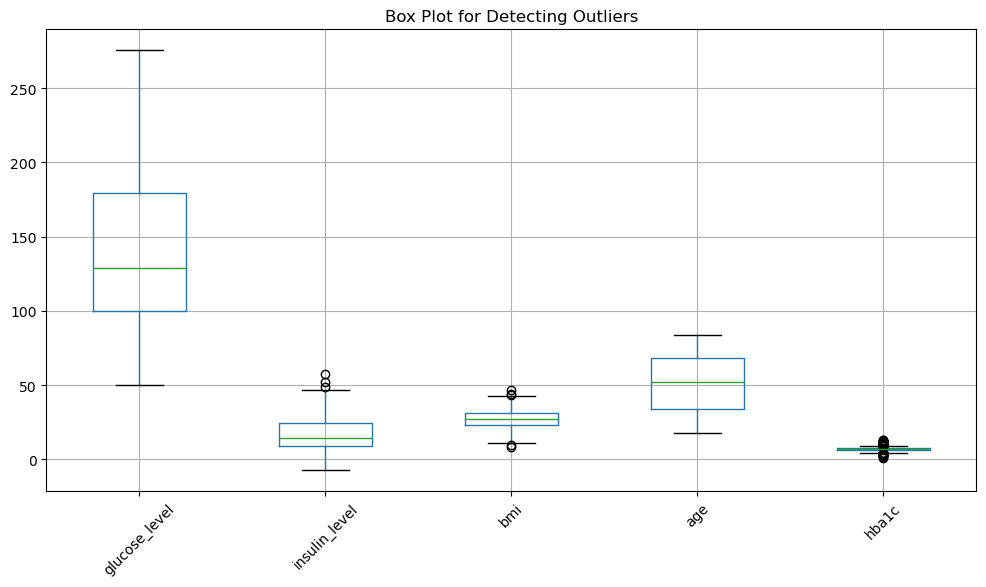

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['glucose_level', 'insulin_level', 'bmi', 'age', 'hba1c']

plt.figure(figsize=(12, 6))
df[num_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Box Plot for Detecting Outliers")
plt.show()

In [16]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25) 
    Q3 = df[column].quantile(0.75)  
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

num_cols = ['glucose_level', 'insulin_level', 'bmi', 'age', 'hba1c']
for col in num_cols:
    df = remove_outliers_iqr(df, col)
print(f"Data shape after outlier removal: {df.shape}")

Data shape after outlier removal: (855, 10)


In [17]:
print(df.dtypes)

diabetes_status              int64
diet_quality                object
physical_activity_level     object
smoking_status              object
family_history              object
glucose_level              float64
insulin_level              float64
bmi                        float64
age                          int64
hba1c                      float64
dtype: object


In [18]:
from sklearn.preprocessing import LabelEncoder

label_cols = ["diabetes_status", "family_history"]

label_encoder = LabelEncoder()
for col in label_cols:
    df[col] = label_encoder.fit_transform(df[col])

df = pd.get_dummies(df, columns=["diet_quality", "physical_activity_level", "smoking_status"], drop_first=True)

print(df.head())

   diabetes_status  family_history  glucose_level  insulin_level        bmi  \
0                0               1      81.512847       1.637218  29.918798   
1                0               0     107.371667      12.784553  30.160025   
3                1               0     186.950405      20.350001  36.065222   
4                0               1      77.492305      17.500545  20.303162   
5                1               1     200.460842      23.089198  22.824456   

   age     hba1c  diet_quality_Excellent  diet_quality_Good  \
0   22  6.434642                   False               True   
1   57  6.636961                   False               True   
3   38  6.636961                   False              False   
4   20  5.794399                   False               True   
5   63  8.811486                   False              False   

   diet_quality_Poor  physical_activity_level_Low  \
0              False                        False   
1              False                    

In [19]:
from sklearn.preprocessing import StandardScaler

num_cols = ["glucose_level", "insulin_level", "bmi", "age", "hba1c"]

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print(df.head())

   diabetes_status  family_history  glucose_level  insulin_level       bmi  \
0                0               1      -1.178148      -1.400496  0.539330   
1                0               0      -0.629450      -0.354949  0.581383   
3                1               0       1.059131       0.354640  1.610823   
4                0               1      -1.263460       0.087380 -1.136942   
5                1               1       1.345809       0.611559 -0.697410   

        age     hba1c  diet_quality_Excellent  diet_quality_Good  \
0 -1.508241 -0.094798                   False               True   
1  0.299799  0.090455                   False               True   
3 -0.681708  0.090455                   False              False   
4 -1.611558 -0.681034                   False               True   
5  0.609749  2.081549                   False              False   

   diet_quality_Poor  physical_activity_level_Low  \
0              False                        False   
1              F

In [20]:
print(df.isnull().sum())

diabetes_status                     0
family_history                      0
glucose_level                       0
insulin_level                       0
bmi                                 0
age                                 0
hba1c                               0
diet_quality_Excellent              0
diet_quality_Good                   0
diet_quality_Poor                   0
physical_activity_level_Low         0
physical_activity_level_Moderate    0
smoking_status_Former Smoker        0
smoking_status_Non-Smoker           0
dtype: int64


In [21]:
print(df.dtypes)

diabetes_status                       int64
family_history                        int32
glucose_level                       float64
insulin_level                       float64
bmi                                 float64
age                                 float64
hba1c                               float64
diet_quality_Excellent                 bool
diet_quality_Good                      bool
diet_quality_Poor                      bool
physical_activity_level_Low            bool
physical_activity_level_Moderate       bool
smoking_status_Former Smoker           bool
smoking_status_Non-Smoker              bool
dtype: object


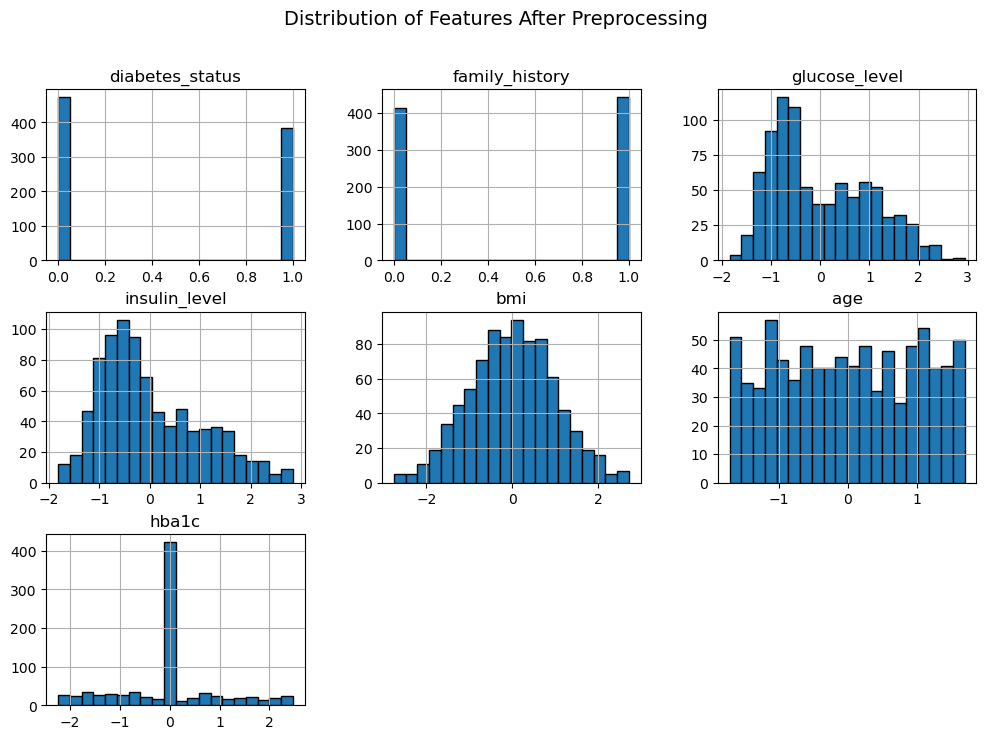

In [22]:
import matplotlib.pyplot as pl
df.hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.suptitle("Distribution of Features After Preprocessing", fontsize=14)
plt.show()

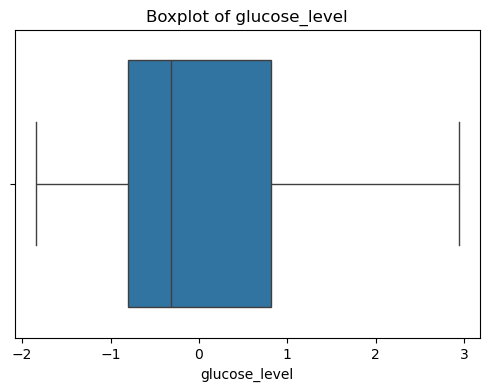

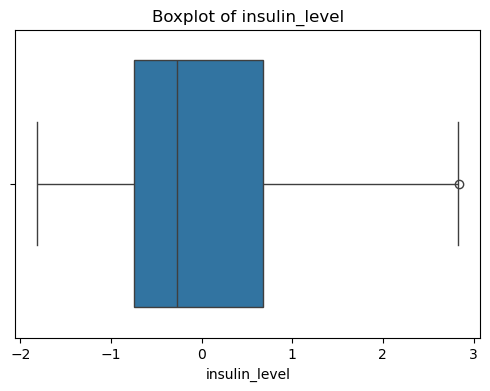

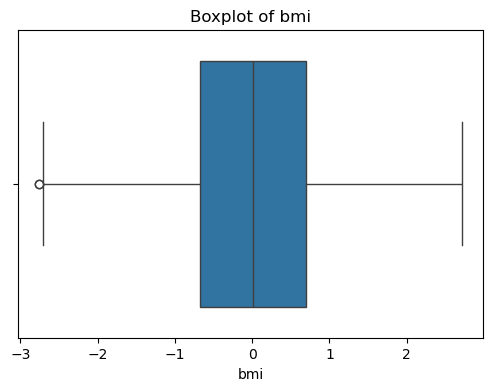

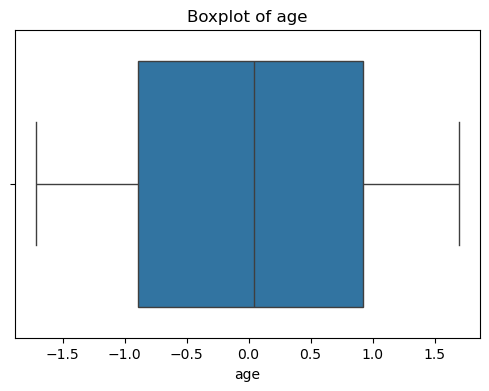

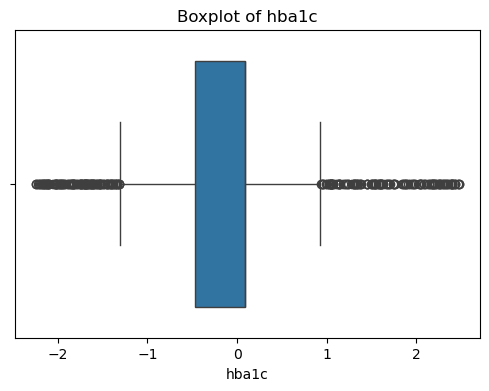

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in ["glucose_level", "insulin_level", "bmi", "age", "hba1c"]:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()